<a href="https://colab.research.google.com/github/IliaGamov/Youtube_Spotify_streaming_EDA/blob/main/colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youtube and Spotify artist content data analysis

This analysis will use information on 2000 Youtube and Spotify artists.


The data is publicly available via the link: 

https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube


Also I published data on Google Drive so anyone with a link can acces it via link

In [ ]:
# Loading zip file in Google Colab:
! gdown --id 1PL4lohfx40BPlh_uWyOAKQQT2COa_dVt

In [ ]:
# Unzipping content
! unzip /content/ytb_sptf.zip

In [ ]:
! pip install phik

In [4]:
# Pandas for dataframe manipulations and numpy for some additional features 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Reading csv file with data
df = pd.read_csv('Spotify_Youtube.csv', index_col=0)

# After loading data, let's check what is inside of it

First of all I want to check number of columns I have and Dtype of each column.

In [17]:
df.sample(2)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
16680,NLE Choppa,https://open.spotify.com/artist/0ErzCpIMyLcjPi...,Slut Me Out,Slut Me Out,single,spotify:track:5BmB3OaQyYXCqRyN8iR2Yi,0.938,0.606,6.0,-6.396,...,https://www.youtube.com/watch?v=iss7pgQbQmo,NLE Choppa - Slut Me Out (Official Music Video),NLE CHOPPA,4183459.0,144438.0,6467.0,"Stream ""Slut Me Out"" by NLE Choppa now: https:...",True,True,34337952.0
18253,Alessia Cara,https://open.spotify.com/artist/2wUjUUtkb5lvLK...,Best Days,In The Meantime,album,spotify:track:3z1DnGBH2uhlDekJr0YVzQ,0.518,0.318,6.0,-11.727,...,https://www.youtube.com/watch?v=TPv64Y56I_4,Alessia Cara - Best Days,AlessiaCaraVEVO,4342905.0,94843.0,2677.0,Stream/Download “In The Meantime” https://Ales...,True,True,24234250.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20718 entries, 0 to 20717
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20718 non-null  object 
 1   Url_spotify       20718 non-null  object 
 2   Track             20718 non-null  object 
 3   Album             20718 non-null  object 
 4   Album_type        20718 non-null  object 
 5   Uri               20718 non-null  object 
 6   Danceability      20716 non-null  float64
 7   Energy            20716 non-null  float64
 8   Key               20716 non-null  float64
 9   Loudness          20716 non-null  float64
 10  Speechiness       20716 non-null  float64
 11  Acousticness      20716 non-null  float64
 12  Instrumentalness  20716 non-null  float64
 13  Liveness          20716 non-null  float64
 14  Valence           20716 non-null  float64
 15  Tempo             20716 non-null  float64
 16  Duration_ms       20716 non-null  float6

## **Unique identification for each song**


Since this dataset represent information about songs, we can use URL as unique identifier for each song, it will help us to remove duplicates and get less noisy data.

There are two types of URL in dataset:

* Spotify URL

* Youtube URL


Let's find out which fits better as unique identifier

In [7]:
# Number of unique Youtube URLs
print('Unique Youtube URL: ', df.Url_youtube.unique().shape[0])

# Number of unique Spotify URLs
print('Unique Spotify URL: ', df.Url_spotify.unique().shape[0])

Unique Youtube URL:  18155
Unique Spotify URL:  2079


**It looks like there is an error in the original description of the dataset. Url_spotify is a link to the artist's spotify page, but not a link to the song**


We can check it easily if spotify link leads us to artist url, this url will contain **/artist/** section inside.

**Example:**
https://open.spotify.com/artist/0CEFCo8288kQU7mJi25s6E


In [8]:
# Check if there all Spotify url contain /artist/ section
print('All spotify url contain /artist/ section:', not bool(df.Url_spotify.apply(lambda x:not '/artist/' in x).sum()))

All spotify url contain /artist/ section: True


## We confirmed that there is an error in Data card that describes features. 

**upd.** When I found this flaw, I contacted the creator of the dataset and the data card was changed. Discussion link: https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube/discussion/405618


Because of that, let's use Youtube url as an ID for song and Spotify URL as an ID for artist.


## **NaN Values**

Firstly I'd like to check the amount of missing values in each column. We've already confirmed that we can use Youtube URL as a unique identificator.

Let's check the amount of NaN values in each column

In [18]:
import missingno as msno
df.isna().sum()

Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

## Missing values visualization 

In order to visualize fraction of null values I'm using missingno library that allows me to see NaN values of each column clearly.

<Axes: >

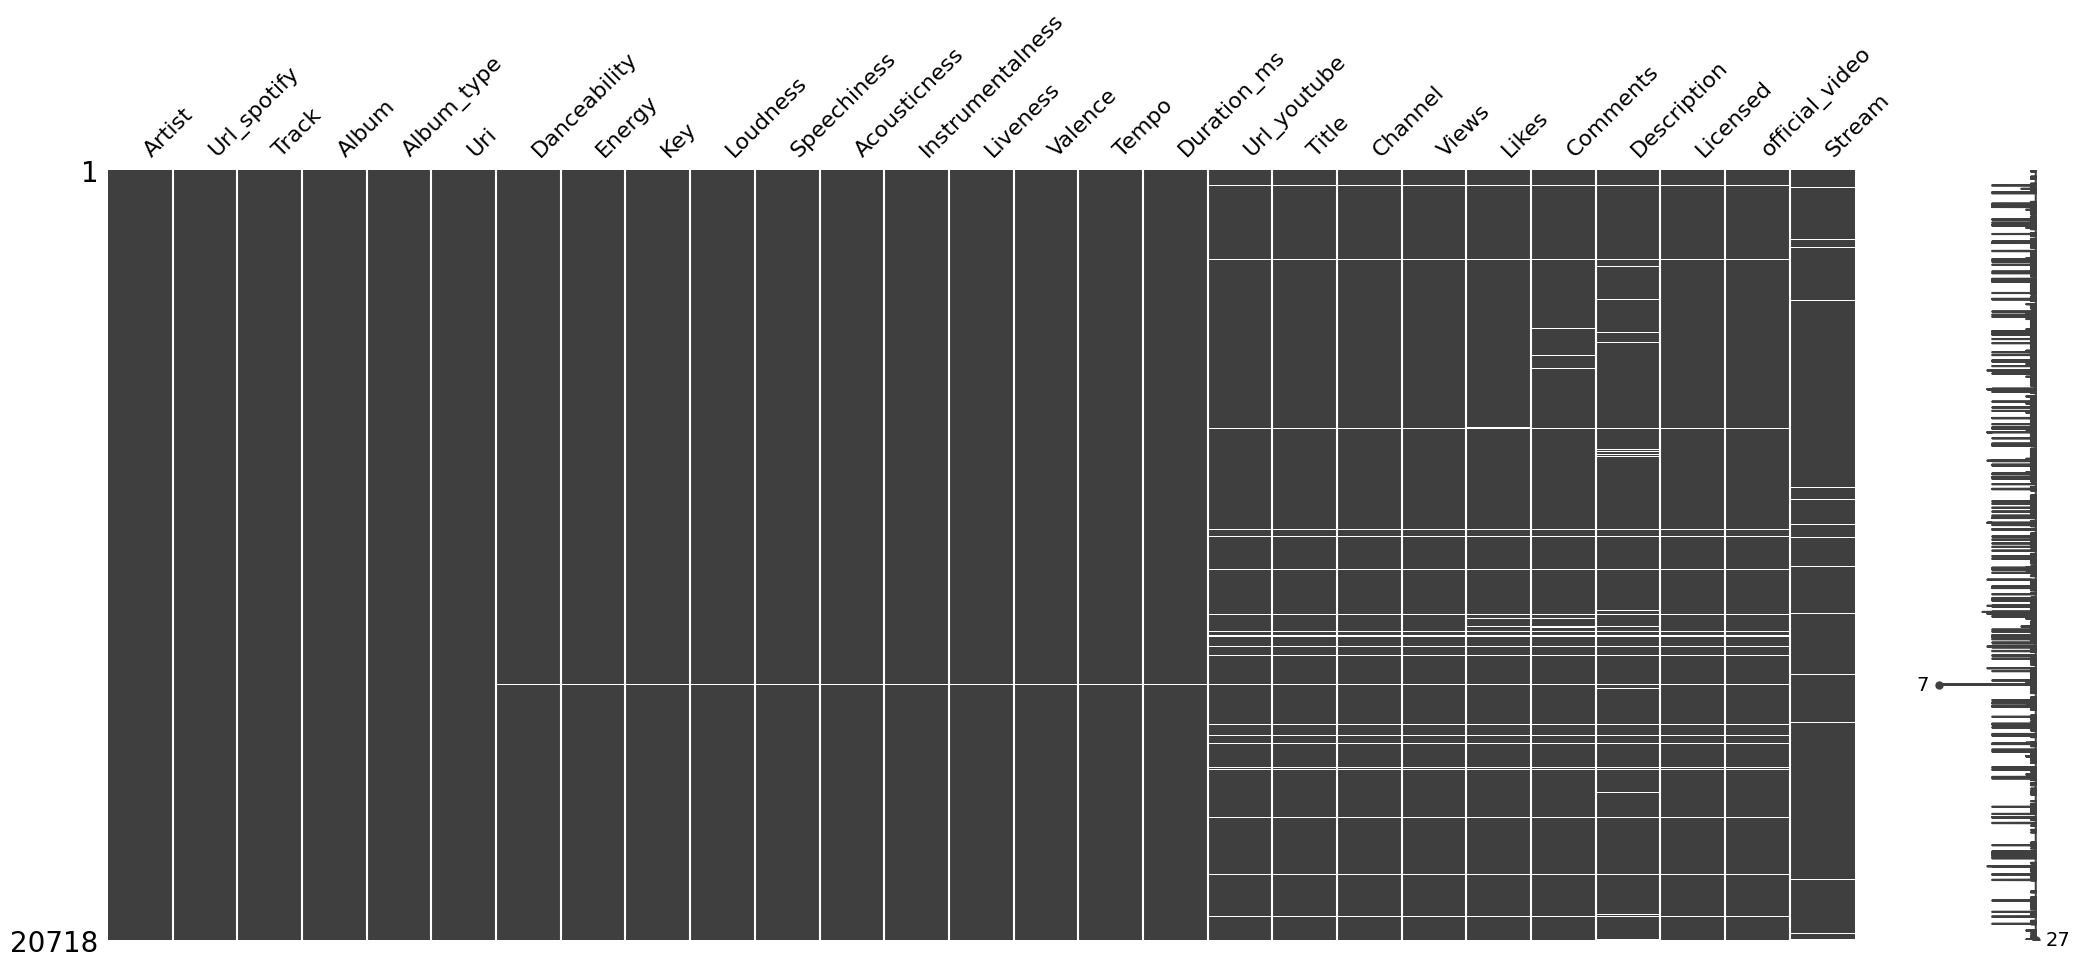

In [21]:
msno.matrix(df)

We can see that rows with NaN Danceability also have missing Energy, Key, Loudness, Speechiness etc values.

Also, It's clearly that NaN View value is a consequence of missing Url_youtube value, probably there was a problem in collecting youtube data for this songs

## At first I'd like to explore numeric data

In [ ]:
# Creating dataframe that consists of float dtype objects
df_numeric = df.select_dtypes(include=[np.float])

<ipython-input-159-1fb8b411c0f7>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_numeric = df.select_dtypes(include=[np.float])


In [ ]:
# Check scale of each numeric column and it's statistic parameters.
df_numeric.describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20078.000000,20078.000000,20078.000000,20078.000000,20078.000000,20078.000000,20078.000000,20078.000000,20078.000000,20078.000000,2.007800e+04,1.997400e+04,1.990500e+04,1.988000e+04,1.954300e+04
mean,0.621046,0.636116,5.304612,-7.625576,0.095953,0.286736,0.054697,0.191295,0.529526,120.680274,2.245528e+05,9.456366e+07,6.682540e+05,2.776915e+04,1.374269e+08
std,0.164432,0.212761,3.577022,4.562669,0.109262,0.284639,0.190416,0.165032,0.245350,29.482458,1.227159e+05,2.761083e+08,1.799222e+06,1.945058e+05,2.466500e+08
min,0.000000,0.000020,0.000000,-44.761000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,2.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.519000,0.510000,2.000000,-8.792250,0.035600,0.043200,0.000000,0.094000,0.338000,97.018250,1.803200e+05,1.867111e+06,2.210300e+04,5.210000e+02,1.789104e+07
50%,0.638000,0.666000,5.000000,-6.525000,0.050500,0.188000,0.000002,0.125000,0.536000,119.965000,2.133330e+05,1.466404e+07,1.263780e+05,3.324500e+03,5.003310e+07
75%,0.742000,0.797000,8.000000,-4.932000,0.104000,0.468000,0.000465,0.234000,0.726000,139.931000,2.522135e+05,7.080013e+07,5.260680e+05,1.444300e+04,1.394445e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


And to make everything clear I'd like to add explanation for some features:


*   **Loudness**: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

*  **Energy**: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

* **Key**: the key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **Speechiness**: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **Acousticness**: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* **Instrumentalness**: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.





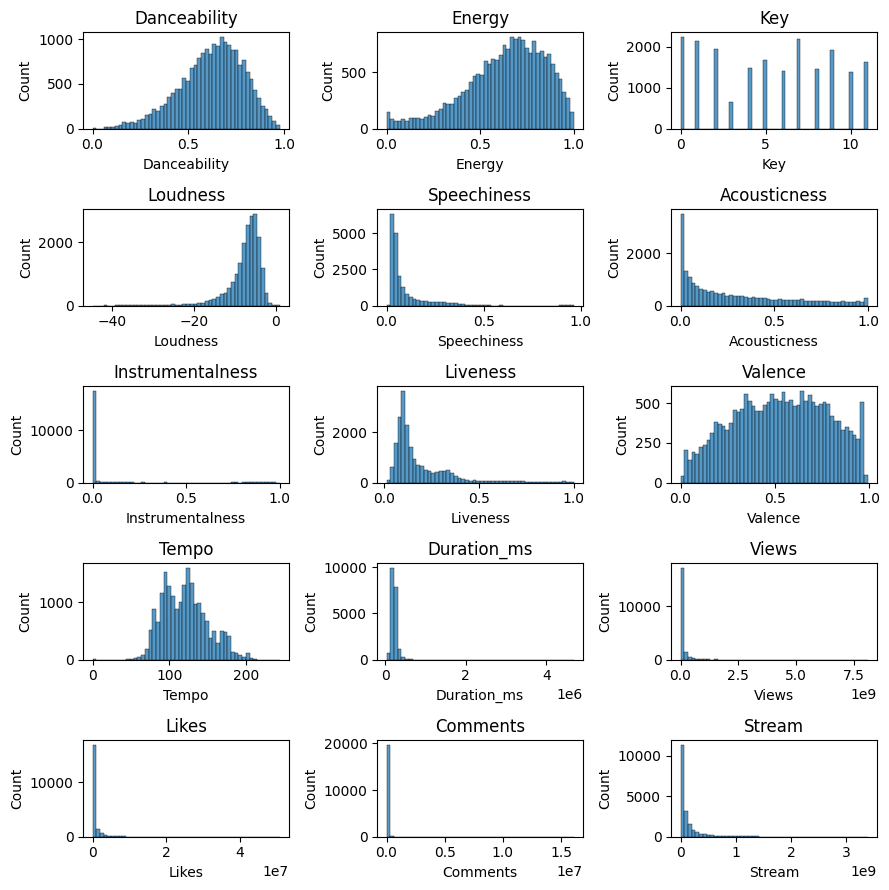

In [ ]:
# Getting numeric feature's names
enum_features = df_numeric.columns

# Set size of the plot
fig = plt.figure(figsize = (9,9))


# Because I decided to take a look at multiple numeric features at once 
# I need to loop through them and put on the subplot
for i, var_name in enumerate(enum_features):

  # Adding subplot on i+1 position
  ax = fig.add_subplot(5, 3, i+1)

  #Seaborn histplot for each numeric feature
  sns.histplot(data = df_numeric, x=var_name, axes=ax, bins=50)

  ax.set_title(var_name)


fig.tight_layout()

plt.show()

**Let's see uf we have linear or non-linear correlations between features**

For this purpose I'm using $\phi_k$ correlation matrix.


In [ ]:
# Importing phik module for non-linear dependencies
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
# Creating phik matrix
phik_matrix_numeric = df_numeric.phik_matrix()

interval columns not set, guessing: ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments', 'Stream']


<Axes: >

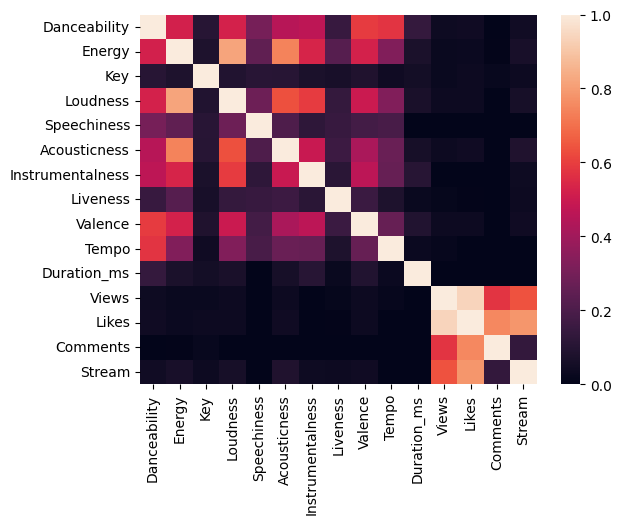

In [ ]:
# Phik matrix heatmap
sns.heatmap(phik_matrix_numeric)

**Intermediate conclusions**

* Such features as Views, Likes, Comments and Stream have strong correlation, with the exception of a pair Stream-Comments. It seems logical, because this values have familiar nature.

* "Key" feature that is actually a categorical feature weakly correlates with other parameters

* We can see see correlation of human perception of music on its acoustic parameters: "Energy" correlates with "Loudness", "Acousticness", "Instrumentalness". "Dancebility" correlates with "Tempo"



**Next:** I'd like to check for some corellations using pivottables and plots, just to make sure if everything works as expected

In [ ]:
# I aggregate numeric values up to 5 groups 
def aggreagate_continious_feature(data, column_name):
  return pd.cut(data[column_name], bins=5,
                labels= [1,2,3,4,5]
            )

# Here I choose features that has phi_k greater or equal to 0.4 with danceability
danc_cor_features = phik_matrix_numeric[phik_matrix_numeric['Danceability']>=0.3].index.to_list()[1:]

#Create features with levels
for danc_cor in danc_cor_features:
  df_numeric['{0}_lvl'.format(danc_cor)] = aggreagate_continious_feature(df_numeric, danc_cor)

**Here I want to visually check if there is some dependencies between numeric features or not**

For that purpose I create a plot between Danceability and other correlated features (according to $\phi_k$ matrix correlation matrix).

I will check dependencies between feature's value level and median value of danceability. I'm using median since my data is non-gaussian (we checked it from the beginning)

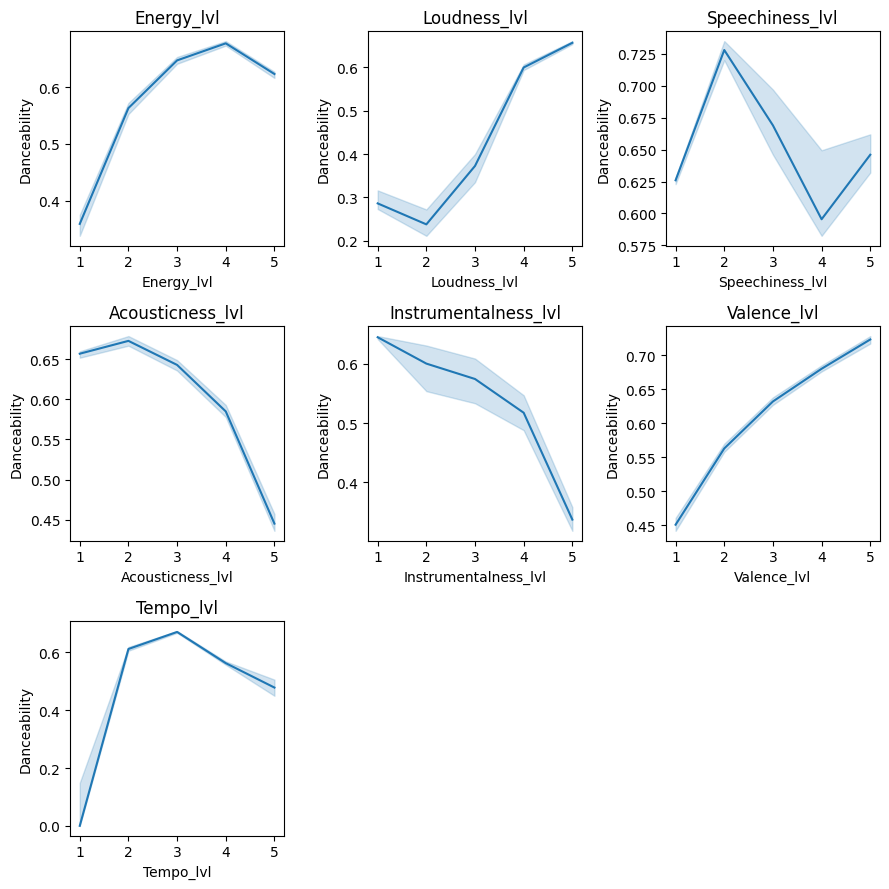

In [ ]:
# Creating list of features to plot
enum_features = ['{0}_lvl'.format(feature) for feature in danc_cor_features]

# Defining plot size
fig = plt.figure(figsize = (9,9))


# Looping through every feature I'm intrested in
for i, var_name in enumerate(enum_features):

  # Adding subplot on i+1 position
  ax = fig.add_subplot(3, 3, i+1)

  # Seaborn lineplot for each metric with Median estimator
  sns.lineplot(data = df_numeric, x=var_name,y='Danceability', axes=ax,estimator=np.median)

  ax.set_title(var_name)


fig.tight_layout()

plt.show()

In [ ]:
df_objects = df.select_dtypes(include='object')

In [ ]:
df_objects = df_objects.astype({'Licensed':bool, 'official_video':bool})